# EDA of script and df
nothin changes in databases

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import math

In [3]:
import schrutepy
from schrutepy import schrutepy 

In [4]:
import nltk
from nltk.corpus import stopwords

stop_words = list(set(stopwords.words('english')))

In [44]:
pd.set_option('display.max_rows', None)

## load script

In [5]:
script = schrutepy.load_schrute()

In [6]:
script.head()

,index,season,episode,episode_name,director,writer,character,text,text_w_direction
0,1,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,All right Jim. Your quarterlies look very good...,All right Jim. Your quarterlies look very good...
1,2,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Jim,"Oh, I told you. I couldn't close it. So...","Oh, I told you. I couldn't close it. So..."
2,3,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,So you've come to the master for guidance? Is ...,So you've come to the master for guidance? Is ...
3,4,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Jim,"Actually, you called me in here, but yeah.","Actually, you called me in here, but yeah."
4,5,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,"All right. Well, let me show you how it's done.","All right. Well, let me show you how it's done."


In [7]:
script.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55130 entries, 0 to 55129
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   index             55130 non-null  int64 
 1   season            55130 non-null  int64 
 2   episode           55130 non-null  int64 
 3   episode_name      55130 non-null  object
 4   director          55130 non-null  object
 5   writer            55130 non-null  object
 6   character         55130 non-null  object
 7   text              54756 non-null  object
 8   text_w_direction  55125 non-null  object
dtypes: int64(3), object(6)
memory usage: 3.8+ MB


In [8]:
def schrut_prep(df):
    df.drop(columns=['index'], axis=1, inplace=True)

    df.drop(df[df.text_w_direction.isna()].index, axis=0, inplace=True)
    
    df.rename(columns={'episode_name':'title','text_w_direction':'text_w'},inplace=True)
    
    return df

In [9]:
script = schrut_prep(script)

In [10]:
script.head()

,season,episode,title,director,writer,character,text,text_w
0,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,All right Jim. Your quarterlies look very good...,All right Jim. Your quarterlies look very good...
1,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Jim,"Oh, I told you. I couldn't close it. So...","Oh, I told you. I couldn't close it. So..."
2,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,So you've come to the master for guidance? Is ...,So you've come to the master for guidance? Is ...
3,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Jim,"Actually, you called me in here, but yeah.","Actually, you called me in here, but yeah."
4,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,"All right. Well, let me show you how it's done.","All right. Well, let me show you how it's done."


In [11]:
script = script.dropna()

## load episode properties

In [12]:
df = pd.read_csv('episode_statistics.csv')

In [13]:
df.head()

,season,title,rating,votes,double,episode,month,director,writer,writer_B.J._Novak,...,mean_replica_length,what_she_said,laughs,singing,applause,accent,unhappy,smile,sigh,phone
0,1,Pilot,7.4,7006,0,1,3,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,0,...,16.862403,0.0,5,1,0,0,1,0,1,4
1,1,Diversity Day,8.3,6902,0,2,3,Ken Kwapis,B.J. Novak,1,...,22.183752,0.0,2,0,0,3,1,0,0,2
2,1,Health Care,7.7,5756,0,3,4,Ken Whittingham,Paul Lieberstein,0,...,27.451737,0.0,3,0,1,0,0,0,0,6
3,1,The Alliance,8.0,5579,0,4,4,Bryan Gordon,Michael Schur,0,...,33.017341,0.0,6,1,0,0,0,0,0,2
4,1,Basketball,8.4,6183,0,5,4,Greg Daniels,Greg Daniels,0,...,37.600000,0.0,3,3,2,0,0,0,0,1


In [14]:
df.columns.values

array(['season', 'title', 'rating', 'votes', 'double', 'episode', 'month',
       'director', 'writer', 'writer_B.J._Novak', 'writer_Mindy_Kaling',
       'writer_Gene_Stupnitsky', 'writer_Justin_Spitzer',
       'writer_Brent_Forrester', 'writer_Jennifer_Celotta',
       'writer_Michael_Schur', 'writer_Warren_Lieberstein',
       'writer_Halsted_Sullivan', 'writer_Aaron_Shure',
       'writer_Daniel_Chun', 'writer_Robert_Padnick',
       'writer_Owen_Ellickson', 'writer_Carrie_Kemper',
       'writer_Allison_Silverman', 'writer_Steve_Hely',
       'writer_Lester_Lewis', 'writer_Steve_Carell', 'writer_Dan_Greaney',
       'writer_Jonathan_Green', 'writer_Gabe_Miller',
       'writer_Anthony_Q._Farrell', 'writer_Graham_Wagner',
       'writer_Dan_Sterling', 'writer_Amelie_Gillette',
       'writer_Nicki_Schwartz-Wright', 'writer_Jon_Vitti',
       'writer_Paul_Lieberstein', 'writer_Ryan_Koh',
       'writer_Tim_McAuliffe', 'writer_Greg_Daniels',
       'writer_Ricky_Gervais', 'writer_St

# Rating distribution

<AxesSubplot:xlabel='rating', ylabel='Count'>

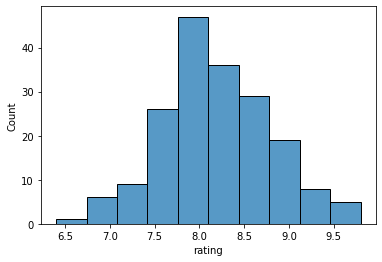

In [15]:
sns.histplot(df.rating, bins=10)

<AxesSubplot:xlabel='season', ylabel='rating'>

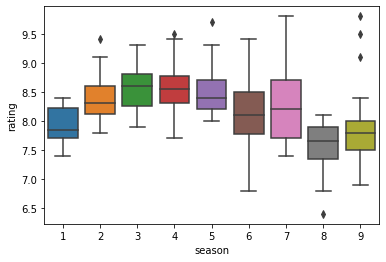

In [16]:
sns.boxplot(x=df.season, y=df.rating)

<AxesSubplot:ylabel='rating'>

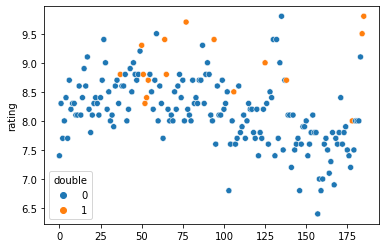

In [17]:
sns.scatterplot(x=df.index,y=df.rating,hue=df.double)

<AxesSubplot:xlabel='month', ylabel='rating'>

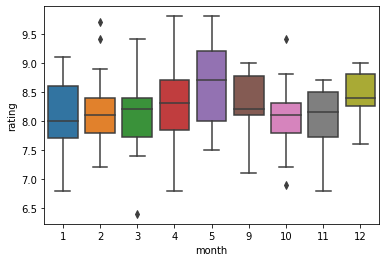

In [18]:
sns.boxplot(x=df.month, y=df.rating)

In [21]:
df[df.double==1].rating.mean()

8.943750000000001

In [22]:
df[df.double==0].rating.mean()

8.142352941176469

In [23]:
df.groupby('writer').mean().rating.sort_values(ascending=False)[:10]

writer
Greg Daniels;Mindy Kaling                      9.400000
Paul Lieberstein;Michael Schur                 9.300000
Jennifer Celotta;Paul Lieberstein              9.200000
Jennifer Celotta;Greg Daniels                  9.200000
Steve Carell                                   8.800000
Greg Daniels                                   8.744444
Lee Eisenberg;Gene Stupnitsky;Michael Schur    8.700000
Lester Lewis                                   8.600000
Jon Vitti                                      8.600000
Brent Forrester;Justin Spitzer                 8.500000
Name: rating, dtype: float64

In [24]:
df.groupby('director').mean().rating.sort_values(ascending=False)[:10]

director
Harold Ramis                     8.933333
Steve Carell                     8.833333
Jason Reitman                    8.700000
Joss Whedon                      8.700000
Paul Feig                        8.700000
Julian Farino                    8.650000
Lee Eisenberg;Gene Stupnitsky    8.650000
Tucker Gates                     8.625000
Bryan Gordon                     8.550000
Ken Kwapis                       8.525000
Name: rating, dtype: float64

<AxesSubplot:xlabel='words', ylabel='rating'>

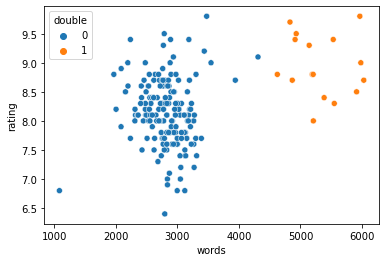

In [25]:
sns.scatterplot(x=df.words,y=df.rating,hue=df.double)

# Greate graph

In [26]:
import networkx as nx

In [27]:
names = ['Michael', 'Dwight', 'Jim', 'Pam', 'Andy', 'Angela', 'Kevin', 'Erin',
       'Oscar', 'Ryan', 'Darryl', 'Phyllis', 'Kelly', 'Toby', 'Jan', 'Stanley',
       'Meredith', 'Holly', 'Nellie', 'Gabe']

In [28]:
names = ['Michael', 'Dwight', 'Jim', 'Pam', 'Andy', 'Angela', 'Kevin']

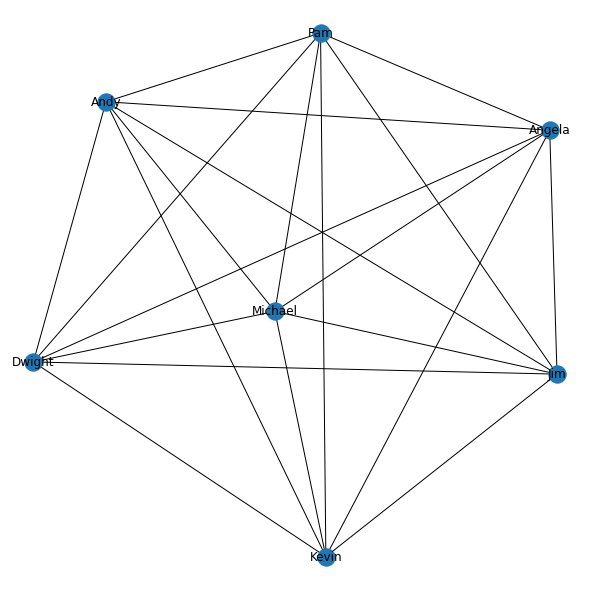

In [29]:
plt.figure(figsize=(8,8))
P = nx.Graph()

for i in range(0, len(names)):
    for j in range(i+1, len(names)):
        name1 = names[i]
        name2 = names[j]
        if name1 != name2:
            coef = df[name1+'_words'].corr(df[name2+'_words'])
            P.add_edge(name1, name2, weight=round((0.5-coef),2))
            

pos = nx.spring_layout(P, scale=2)
nx.draw(P, with_labels=True)

# nx.draw(P, pos, with_labels=True)
# nx.draw_networkx_edge_labels(P, pos)
plt.show()

# nx.draw(P,with_labels=True)

# plt.show()


# Clusterting

In [32]:
from sklearn.cluster import KMeans

In [33]:
names = ['Michael', 'Dwight', 'Jim', 'Pam', 'Andy', 'Angela', 'Kevin', 'Erin',
       'Oscar', 'Ryan', 'Darryl', 'Phyllis', 'Kelly', 'Toby', 'Jan', 'Stanley',
       'Meredith', 'Holly', 'Nellie', 'Gabe']
col_names = []
for name in names:
    col_names.append(name+'_words')

In [34]:
X = df[col_names].transpose()

In [35]:
y_pred = KMeans(n_clusters=3, ).fit_predict(X)

In [36]:
y_pred

array([1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [37]:
color_code = {}
color_array = ['red','blue','black','green','cyan']
i = 0
for name, cluster in zip(col_names,y_pred):
    color_code.update({name: color_array[cluster]})
    i += 1

In [38]:
color_code

{'Michael_words': 'blue',
 'Dwight_words': 'black',
 'Jim_words': 'black',
 'Pam_words': 'black',
 'Andy_words': 'black',
 'Angela_words': 'red',
 'Kevin_words': 'red',
 'Erin_words': 'red',
 'Oscar_words': 'red',
 'Ryan_words': 'red',
 'Darryl_words': 'red',
 'Phyllis_words': 'red',
 'Kelly_words': 'red',
 'Toby_words': 'red',
 'Jan_words': 'red',
 'Stanley_words': 'red',
 'Meredith_words': 'red',
 'Holly_words': 'red',
 'Nellie_words': 'red',
 'Gabe_words': 'red'}

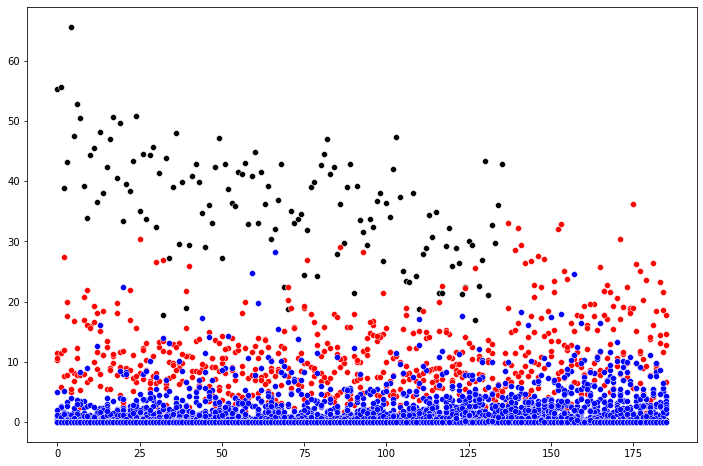

In [149]:
plt.figure(figsize=[12,8])
for name in col_names:
#         print(i, X[X.index==name][i])
    sns.scatterplot(x=np.arange(0,186), y=X[X.index==name].values[0],color=color_code[name])

# Who said more frequently ...

In [46]:
characters = ['Michael', 'Dwight', 'Jim', 'Pam', 'Andy', 'Angela', 'Kevin', 'Erin',
       'Oscar', 'Ryan', 'Darryl', 'Phyllis', 'Kelly', 'Toby', 'Jan', 'Stanley',
       'Meredith', 'Holly', 'Nellie', 'Gabe']

In [310]:
df_char_words = pd.DataFrame(index=characters)

df_char_words['words'] = np.nan
for person in characters:
    df_char_words.loc[df_char_words.index==person,'words'] = df[person + '_words'].sum()

In [315]:
words_list = ['sorry','all right','thank','what she said','hell','shut up','money','sales','love','dunder','paper',
              'michael']

In [316]:
for word in words_list:
    df_char_words[word] = np.nan
    for person in characters:
        text_row = ' '.join( word for word in script[script.character==person].text)
        
        tot_words_for_person = df_char_words[df_char_words.index==person].words
        df_char_words.loc[df_char_words.index==person,[word]] = 100*text_row.lower().count(word)/tot_words_for_person

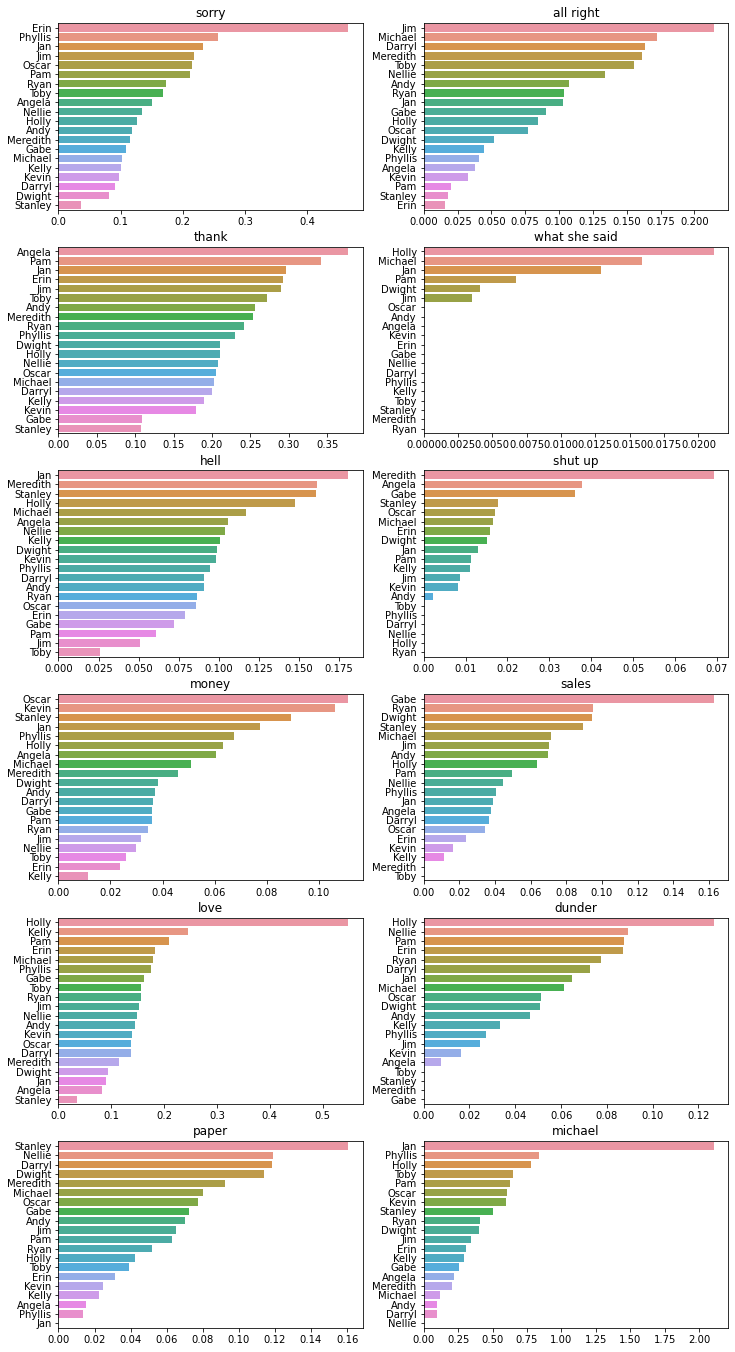

In [317]:
words_n = len(words_list)

fig, ax = plt.subplots(figsize=(12,2*words_n),nrows=round(words_n/2), ncols=2)

k = 0
for word in words_list:
    stat = df_char_words[word].sort_values(ascending=False)
    sns.barplot(x=stat.values, y=stat.index, ax=ax[math.floor(k/2),k%2]).set(title=word)
    k += 1

# tf-idf for each characters

## mean length of repica - distribution

# Dialog analysis

In [35]:
dialog_columns = []
for word in df.columns.values:
    if '_dialog' in word:
        dialog_columns.append(word)

In [45]:
df[dialog_columns].sum().sort_values(ascending=False)

Dwight_Michael_dialog      2261
Jim_Pam_dialog             1677
Dwight_Jim_dialog          1247
Michael_Pam_dialog         1136
Jim_Michael_dialog         1041
Jan_Michael_dialog          712
Andy_Erin_dialog            438
Andy_Dwight_dialog          431
Holly_Michael_dialog        415
Andy_Jim_dialog             374
Dwight_Pam_dialog           350
Andy_Michael_dialog         336
Darryl_Michael_dialog       332
Michael_Toby_dialog         328
Michael_Ryan_dialog         325
Michael_Stanley_dialog      259
Andy_Darryl_dialog          253
Angela_Dwight_dialog        223
Kevin_Michael_dialog        200
Michael_Oscar_dialog        184
Erin_Michael_dialog         182
Michael_Phyllis_dialog      156
Dwight_Erin_dialog          154
Dwight_Ryan_dialog          151
Angela_Michael_dialog       120
Jim_Ryan_dialog             115
Angela_Oscar_dialog         114
Darryl_Dwight_dialog        111
Dwight_Nellie_dialog        107
Andy_Pam_dialog             107
Dwight_Phyllis_dialog       103
Andy_Osc

In [52]:
for name in characters:
    tot_dialog = 0
    for cols in dialog_columns:
        if name in cols:
            tot_dialog += df[cols].sum()
        
    print(name, tot_dialog)

Michael 8227
Dwight 5529
Jim 4877
Pam 3955
Andy 2477
Angela 808
Kevin 672
Erin 987
Oscar 650
Ryan 841
Darryl 923
Phyllis 395
Kelly 419
Toby 588
Jan 900
Stanley 360
Meredith 195
Holly 437
Nellie 367
Gabe 295


## Suprised connection/disconnetions

zero dialogs   
Phyllis_Toby_dialog    
Angela_Stanley_dialog  
Angela_Toby_dialog   

Pam_Stanley_dialog

Meredith_Phyllis_dialog   
Meredith_Ryan_dialog   
Meredith_Oscar_dialog  
Meredith_Stanley_dialog   
Kevin_Meredith_dialog    

## Evolution of dialog length for characters

In [90]:
df['order'] = df.index
corrs = df.corr().order[dialog_columns].sort_values()
df.drop(columns='order',axis=1, inplace=True)
corrs

Dwight_Michael_dialog     -0.471704
Jan_Michael_dialog        -0.350119
Michael_Stanley_dialog    -0.303381
Michael_Pam_dialog        -0.295928
Michael_Ryan_dialog       -0.269928
Michael_Toby_dialog       -0.243451
Angela_Michael_dialog     -0.215315
Jim_Michael_dialog        -0.203706
Kelly_Michael_dialog      -0.198216
Michael_Oscar_dialog      -0.181470
Jim_Kevin_dialog          -0.167291
Michael_Phyllis_dialog    -0.165471
Ryan_Toby_dialog          -0.164283
Darryl_Michael_dialog     -0.153156
Jan_Jim_dialog            -0.127183
Ryan_Stanley_dialog       -0.119417
Jim_Pam_dialog            -0.114860
Dwight_Jan_dialog         -0.113358
Kelly_Pam_dialog          -0.107262
Angela_Kelly_dialog       -0.103926
Jan_Kelly_dialog          -0.099274
Pam_Toby_dialog           -0.099085
Kevin_Michael_dialog      -0.097874
Kelly_Stanley_dialog      -0.095166
Jim_Kelly_dialog          -0.089404
Angela_Jim_dialog         -0.086267
Kevin_Phyllis_dialog      -0.080104
Dwight_Phyllis_dialog     -0

<AxesSubplot:ylabel='Jim_Pam_dialog'>

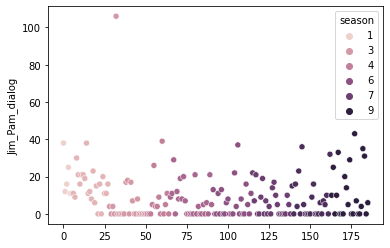

In [97]:
sns.scatterplot(x=df.index, y=df.Jim_Pam_dialog, hue=df.season)

The longest dialog between Jim and Pam is they talking with each other on phone while Jim works in other brunch.

In [54]:
df[df.Jim_Pam_dialog>100]

,season,title,rating,votes,double,episode,month,director,writer,writer_B.J._Novak,...,mean_replica_length,what_she_said,laughs,singing,applause,accent,unhappy,smile,sigh,phone
32,3,Initiation,8.1,4248,0,5,10,Randall Einhorn,B.J. Novak,1,...,171.277372,0.0,0,2,0,0,0,0,0,1


<AxesSubplot:ylabel='Dwight_Michael_dialog'>

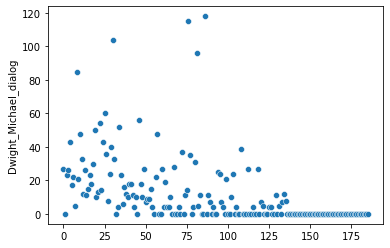

In [95]:
sns.scatterplot(x=df.index, y=df.Dwight_Michael_dialog)

<AxesSubplot:ylabel='Dwight_Jim_dialog'>

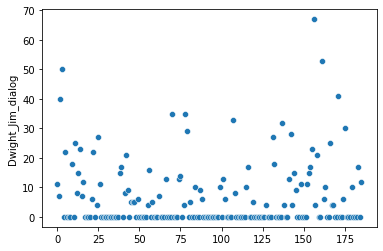

In [56]:
sns.scatterplot(x=df.index, y=df.Dwight_Jim_dialog)

<AxesSubplot:ylabel='Jim_Stanley_dialog'>

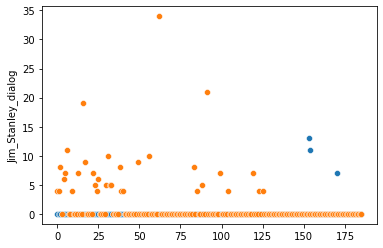

In [68]:
sns.scatterplot(x=df.index, y=df.Jim_Stanley_dialog)
sns.scatterplot(x=df.index, y=df.Michael_Stanley_dialog)

<AxesSubplot:ylabel='Oscar_Toby_dialog'>

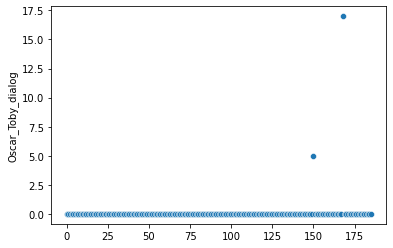

In [69]:
sns.scatterplot(x=df.index, y=df.Oscar_Toby_dialog)


<AxesSubplot:xlabel='order', ylabel='Andy_Erin_dialog'>

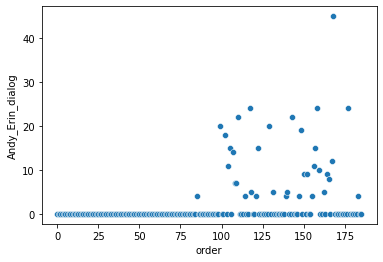

In [94]:
sns.scatterplot(data=df,x='order', y='Andy_Erin_dialog')